# Microwave & Hyperspectral RS & Digital Image Processing Lab-1

# READING TIFF IMAGES

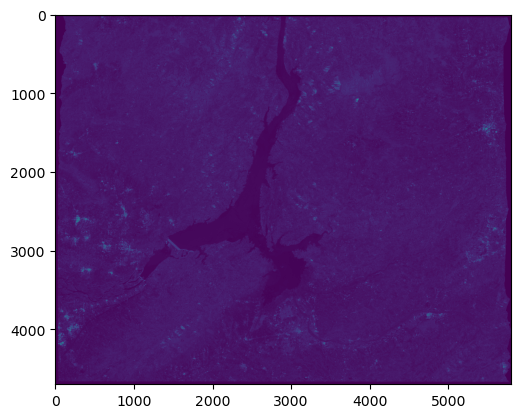

In [1]:
import rasterio
from rasterio.plot import show
# import rasterio
import geotiff
import tifffile
from PIL import Image
img = Image.open("C:\\Users\\hp\\DIP\\Task-1\\HH-ALPSRP092870670-H2.2_UA.tif")
show(img)
pixels = img.load()


# META DATA ABOUT TIFF IMAGES

In [2]:
import rasterio

# Open the GeoTIFF image
with rasterio.open("C:\\Users\\hp\\DIP\\Task-1\\HH-ALPSRP092870670-H2.2_UA.tif") as dataset:
    # Check the size (dimensions)
    width = dataset.width
    height = dataset.height
    print("Image Size (Width x Height):", width, "x", height)

    # Check the number of bands
    num_bands = dataset.count
    print("Number of Bands:", num_bands)

Image Size (Width x Height): 5800 x 4700
Number of Bands: 1


In [3]:
print(dataset.count)
print(dataset.width)
print(dataset.height)

1
5800
4700


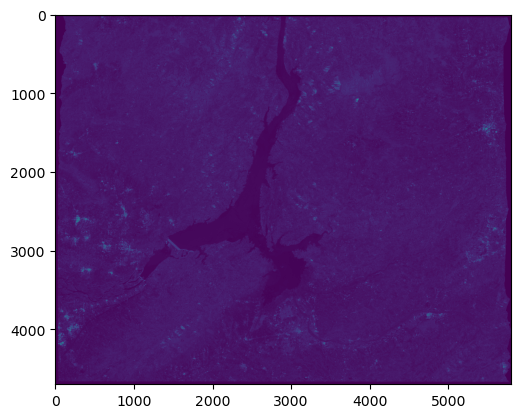

In [4]:
import matplotlib.pyplot as plt
plt.imshow(img)

In [20]:
import numpy as np
from PIL import Image

# Open the image
img = Image.open("C:\\Users\\hp\\DIP\\Task-1\\HH-ALPSRP092870670-H2.2_UA.tif")

# Convert the image to a NumPy array
img_array = np.array(img)

# Calculate image statistics
mean = np.mean(img_array)
std_dev = np.std(img_array)
min = np.min(img_array)
max = np.max(img_array)

# Print the results
print("Mean:", mean)
print("Standard Deviation:", std_dev)
print("Min:", min)
print("Max:", max)


Mean: 4111.402423954512
Standard Deviation: 2206.6430873779523
Min: 0
Max: 65535


In [9]:
width, height = img.size

# Print the results
print("Width:", width)
print("Height:", height)

Width: 5800
Height: 4700


# REDUCING SIZE OF THE IMAGE 

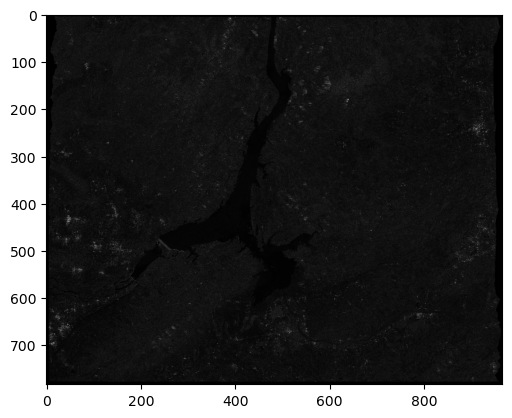

In [21]:
from rasterio.plot import show
# import rasterio
import geotiff
import tifffile
# from PIL import Image
import matplotlib.pyplot as plt
import cv2
import numpy as np

 
try:
    # Read image from disk.
    img = cv2.imread("C:\\Users\\hp\\DIP\\Task-1\\HH-ALPSRP092870670-H2.2_UA.tif")
 
    # Get number of pixel horizontally and vertically. 
    (height, width) = img.shape[:2]    
 
    # Specify the size of image along with interpolation methods.
    # cv2.INTER_AREA is used for shrinking, whereas cv2.INTER_CUBIC
    # is used for zooming.
    res = cv2.resize(img, (int(width / 6), int(height / 6)), interpolation=cv2.INTER_CUBIC)
 
    # Write image back to disk.
    cv2.imwrite('result.tiff', res)
 
except IOError:
    print('Error while reading files !!!')
plt.imshow(res)

# ROTATING TIFF IMAGE 

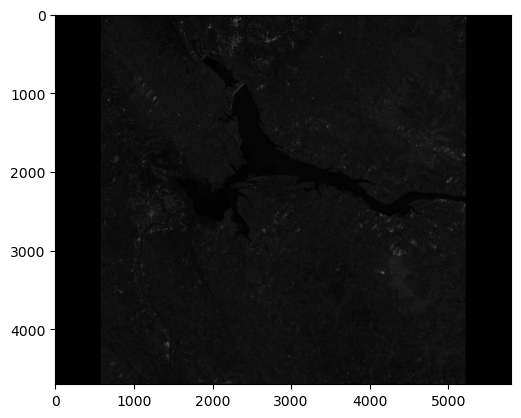

In [22]:
try:
    # Read image from disk.
    img = cv2.imread("C:\\Users\\hp\\DIP\\Task-1\\HH-ALPSRP092870670-H2.2_UA.tif")
     # Shape of image in terms of pixels.
    (rows, cols) = img.shape[:2]
 
    # getRotationMatrix2D creates a matrix needed for transformation.
    # We want matrix for rotation w.r.t center to 45 degree without scaling.
    M = cv2.getRotationMatrix2D((cols /2, rows / 2), 270, 1)
    res1 = cv2.warpAffine(img, M, (cols, rows))
 
    # Write image back to disk.
    cv2.imwrite('result.tiff', res1)
 
except IOError:
    print('Error while reading files !!!')
plt.imshow(res1)

# TRANSLATING MATRIX

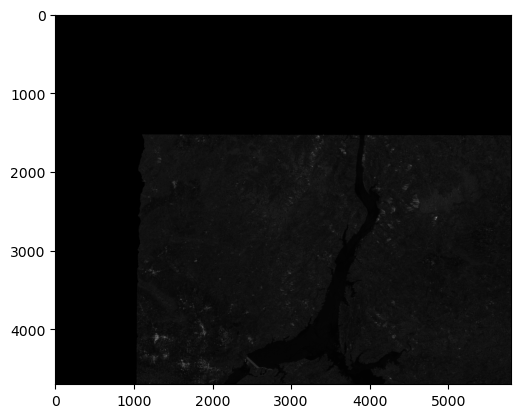

In [23]:
# Let's shift by (100, 50).
M = np.float32([[1, 0, 1000], [0, 1, 1500]])
try:
    # Read image from disk.
    img = cv2.imread("C:\\Users\\hp\\DIP\\Task-1\\HH-ALPSRP092870670-H2.2_UA.tif")
 
     # warpAffine does appropriate shifting given the
    # translation matrix.
    res2 = cv2.warpAffine(img, M, (cols, rows))
 
    # Write image back to disk.
    cv2.imwrite('result.tiff', res2)
 
except IOError:
    print('Error while reading files !!!')
plt.imshow(res2)

# CANNY EDGE DETECTION 

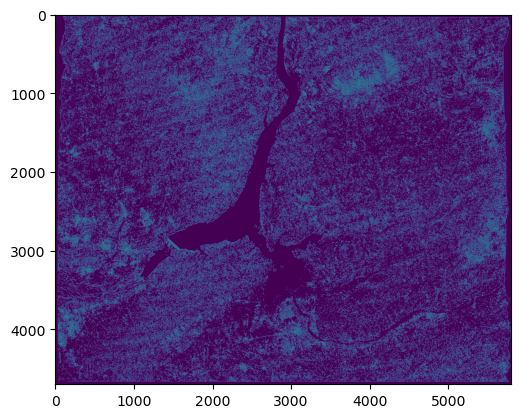

In [27]:
try:
    # Read image from disk.
    img = cv2.imread("C:\\Users\\hp\\DIP\\Task-1\\HH-ALPSRP092870670-H2.2_UA.tif")
 
     
     # Canny edge detection.
    edges = cv2.Canny(img, 40, 60)
 
    # Write image back to disk.
    cv2.imwrite('result.tiff', edges)
 
except IOError:
    print('Error while reading files !!!')
plt.imshow(edges)

# RGB

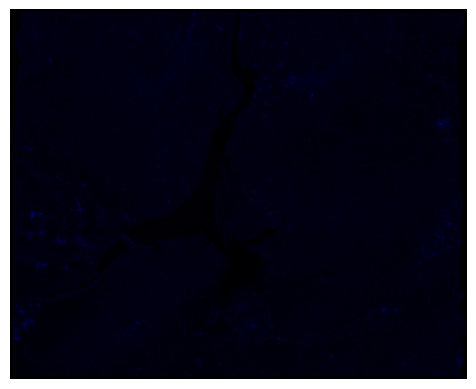

In [1]:
import cv2
import matplotlib.pyplot as plt

# Read the image
img2 = cv2.imread("C:\\Users\\hp\\DIP\\Task-1\\HH-ALPSRP092870670-H2.2_UA.tif")

# Convert BGR to RGB color space (matplotlib expects RGB)
img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2HSV)


# Display the image
plt.imshow(img2_rgb)
plt.axis('off')  # Remove axis ticks and labels
plt.show()